In [641]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [642]:
data_0 = pd.read_excel(r"C:\Users\billi\Downloads\Biogas Dataset\agstar-livestock-ad-database-combined.xlsx")
data_0.head()

,Project Name,Cluster Name,Project Type,City,County,State,Digester Type,Status,Year Operational,Animal/Farm Type(s),...,Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,System Designer(s)/Developer(s) and Affiliates,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Sheet,Year Shutdown,Reason for Closure
0,Cargill - Sandy River Farm Digester,NaN,Farm Scale,Morrilton,Conway,AR,Covered Lagoon,Operational,2008.0,Swine,...,NaN,Flared Full-time,NaN,Martin Construction Resource LLC (formerly RCM...,NaN,4482.755303,NaN,Operational and Construction,NaN,NaN
1,Butterfield RNG Digester,NaN,Farm Scale,Buckeye,Maricopa,AZ,Mixed Plug Flow,Operational,2022.0,Dairy,...,NaN,Pipeline Gas,NaN,"Avolta [Project Developer]; DVO, Inc. (formerl...",Southwest Gas,14030.128975,Yes,Operational and Construction,NaN,NaN
2,Caballero Dairy Farms Digester,NaN,Farm Scale,Eloy,Pinal,AZ,Unknown or Unspecified,Construction,2022.0,Dairy,...,NaN,Pipeline Gas,NaN,Brightmark [Project Developer],NaN,98999.890159,NaN,Operational and Construction,NaN,NaN
3,Green Gas Partners Stanfield Digester,NaN,Centralized/Regional,Maricopa,Pinal,AZ,Complete Mix,Operational,2018.0,Dairy,...,NaN,Pipeline Gas,NaN,Equilibrium Capital [Project Developer]; Green...,Kinger Morgan El Paso,337499.625540,NaN,Operational and Construction,NaN,NaN
4,Paloma Dairy Digester,NaN,Farm Scale,Gila Bend,Maricopa,AZ,Complete Mix,Operational,2021.0,Dairy,...,NaN,CNG,NaN,Black Bear Environmental Assets [Project Devel...,Southwest Gas Company,100569.493399,NaN,Operational and Construction,NaN,NaN


In [643]:
columns_to_drop = ['Project Name', 'Cluster Name', 'Project Type', 'City', 'County', 'State', 'Status', 'Year Operational', 'Electricity Generated (kWh/yr)', 'Biogas End Use(s)', 'LCFS Pathway?', 'System Designer(s)/Developer(s) and Affiliates', 'Receiving Utility', 'Awarded USDA Funding?', 'Sheet', 'Year Shutdown', 'Reason for Closure']
data_0.drop(columns=columns_to_drop, inplace=True)

In [644]:
data_0.head()

,Digester Type,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Total Emission Reductions (MTCO2e/yr)
0,Covered Lagoon,Swine,NaN,NaN,NaN,4200.0,NaN,1814400.0,4482.755303
1,Mixed Plug Flow,Dairy,NaN,11760.0,NaN,NaN,NaN,NaN,14030.128975
2,Unknown or Unspecified,Dairy,NaN,8800.0,NaN,NaN,NaN,NaN,98999.890159
3,Complete Mix,Dairy,NaN,30000.0,NaN,NaN,NaN,3454500.0,337499.625540
4,Complete Mix,Dairy,NaN,10000.0,NaN,NaN,NaN,NaN,100569.493399


In [645]:
columns_to_drop = ['Co-Digestion']
data_0.drop(columns=columns_to_drop, inplace=True)
data_0.head()

,Digester Type,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day),Total Emission Reductions (MTCO2e/yr)
0,Covered Lagoon,Swine,NaN,NaN,NaN,4200.0,1814400.0,4482.755303
1,Mixed Plug Flow,Dairy,NaN,11760.0,NaN,NaN,NaN,14030.128975
2,Unknown or Unspecified,Dairy,NaN,8800.0,NaN,NaN,NaN,98999.890159
3,Complete Mix,Dairy,NaN,30000.0,NaN,NaN,3454500.0,337499.625540
4,Complete Mix,Dairy,NaN,10000.0,NaN,NaN,NaN,100569.493399


In [646]:
data_0['Quantity'] = data_0[['Cattle', 'Dairy', 'Poultry', 'Swine']].sum(axis=1)

In [647]:
data_0.head()

,Digester Type,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day),Total Emission Reductions (MTCO2e/yr),Quantity
0,Covered Lagoon,Swine,NaN,NaN,NaN,4200.0,1814400.0,4482.755303,4200.0
1,Mixed Plug Flow,Dairy,NaN,11760.0,NaN,NaN,NaN,14030.128975,11760.0
2,Unknown or Unspecified,Dairy,NaN,8800.0,NaN,NaN,NaN,98999.890159,8800.0
3,Complete Mix,Dairy,NaN,30000.0,NaN,NaN,3454500.0,337499.625540,30000.0
4,Complete Mix,Dairy,NaN,10000.0,NaN,NaN,NaN,100569.493399,10000.0


In [648]:
data_0.fillna(0, inplace=True)

In [649]:
data_0.head()

,Digester Type,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day),Total Emission Reductions (MTCO2e/yr),Quantity
0,Covered Lagoon,Swine,0.0,0.0,0.0,4200.0,1814400.0,4482.755303,4200.0
1,Mixed Plug Flow,Dairy,0.0,11760.0,0.0,0.0,0.0,14030.128975,11760.0
2,Unknown or Unspecified,Dairy,0.0,8800.0,0.0,0.0,0.0,98999.890159,8800.0
3,Complete Mix,Dairy,0.0,30000.0,0.0,0.0,3454500.0,337499.625540,30000.0
4,Complete Mix,Dairy,0.0,10000.0,0.0,0.0,0.0,100569.493399,10000.0


In [650]:
data_0['Total waste kg/day']= (data_0['Cattle'] *36.9) +\
                                (data_0['Dairy'] *68) +\
                                (data_0['Poultry'] *0.28)+\
                                 (data_0['Swine'] *5.7)
data_0[['Cattle', 'Dairy', 'Poultry', 'Swine', 'Total waste kg/day']].head()

,Cattle,Dairy,Poultry,Swine,Total waste kg/day
0,0.0,0.0,0.0,4200.0,23940.0
1,0.0,11760.0,0.0,0.0,799680.0
2,0.0,8800.0,0.0,0.0,598400.0
3,0.0,30000.0,0.0,0.0,2040000.0
4,0.0,10000.0,0.0,0.0,680000.0


In [651]:
data_0.head()

,Digester Type,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day),Total Emission Reductions (MTCO2e/yr),Quantity,Total waste kg/day
0,Covered Lagoon,Swine,0.0,0.0,0.0,4200.0,1814400.0,4482.755303,4200.0,23940.0
1,Mixed Plug Flow,Dairy,0.0,11760.0,0.0,0.0,0.0,14030.128975,11760.0,799680.0
2,Unknown or Unspecified,Dairy,0.0,8800.0,0.0,0.0,0.0,98999.890159,8800.0,598400.0
3,Complete Mix,Dairy,0.0,30000.0,0.0,0.0,3454500.0,337499.625540,30000.0,2040000.0
4,Complete Mix,Dairy,0.0,10000.0,0.0,0.0,0.0,100569.493399,10000.0,680000.0


In [652]:
columns_to_drop = ['Total Emission Reductions (MTCO2e/yr)', 'Cattle', 'Dairy', 'Poultry', 'Swine']
data_0.drop(columns=columns_to_drop, inplace=True)
data_0.head()

,Digester Type,Animal/Farm Type(s),Biogas Generation Estimate (cu-ft/day),Quantity,Total waste kg/day
0,Covered Lagoon,Swine,1814400.0,4200.0,23940.0
1,Mixed Plug Flow,Dairy,0.0,11760.0,799680.0
2,Unknown or Unspecified,Dairy,0.0,8800.0,598400.0
3,Complete Mix,Dairy,3454500.0,30000.0,2040000.0
4,Complete Mix,Dairy,0.0,10000.0,680000.0


In [653]:
data_0.isnull().sum()

Digester Type                             0
Animal/Farm Type(s)                       0
Biogas Generation Estimate (cu-ft/day)    0
Quantity                                  0
Total waste kg/day                        0
dtype: int64

In [654]:
data_1 = data_0.dropna()
data_1.head()

,Digester Type,Animal/Farm Type(s),Biogas Generation Estimate (cu-ft/day),Quantity,Total waste kg/day
0,Covered Lagoon,Swine,1814400.0,4200.0,23940.0
1,Mixed Plug Flow,Dairy,0.0,11760.0,799680.0
2,Unknown or Unspecified,Dairy,0.0,8800.0,598400.0
3,Complete Mix,Dairy,3454500.0,30000.0,2040000.0
4,Complete Mix,Dairy,0.0,10000.0,680000.0


In [655]:
data_1 = data_1[data_1['Biogas Generation Estimate (cu-ft/day)'] != 0.0]

In [656]:
data_1.head()

,Digester Type,Animal/Farm Type(s),Biogas Generation Estimate (cu-ft/day),Quantity,Total waste kg/day
0,Covered Lagoon,Swine,1814400.0,4200.0,23940.0
3,Complete Mix,Dairy,3454500.0,30000.0,2040000.0
9,Covered Lagoon,Dairy,600000.0,15500.0,1054000.0
10,Covered Lagoon,Dairy,50000.0,1700.0,115600.0
11,Covered Lagoon,Dairy,270000.0,9700.0,659600.0


In [657]:
data_1.shape

(232, 5)

<Axes: xlabel='Digester Type'>

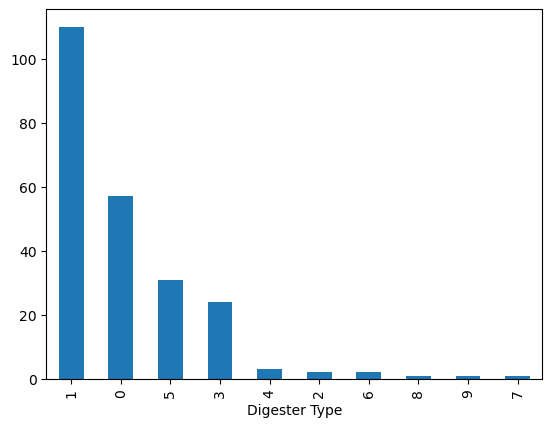

In [710]:
data_1['Digester Type'].value_counts().plot(kind='bar')

In [712]:
data_1 = data_1[data_1['Digester Type'] != '4, 2, 6, 8, 9, 7']

<Axes: xlabel='Digester Type'>

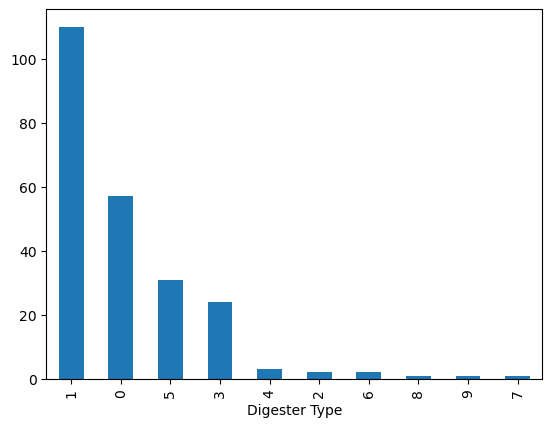

In [714]:
data_1['Digester Type'].value_counts().plot(kind='bar')

# Encoding 

In [659]:
le = preprocessing.LabelEncoder()
Digester_Type = le.fit_transform(data_1['Digester Type'])

In [660]:
le = preprocessing.LabelEncoder()
Animal_Type = le.fit_transform(data_1['Animal/Farm Type(s)'])

In [661]:
data_1.iloc[:, 0] = Digester_Type

In [662]:
data_1.iloc[:, 1] = Animal_Type

In [663]:
data_1.head()

,Digester Type,Animal/Farm Type(s),Biogas Generation Estimate (cu-ft/day),Quantity,Total waste kg/day
0,1,7,1814400.0,4200.0,23940.0
3,0,3,3454500.0,30000.0,2040000.0
9,1,3,600000.0,15500.0,1054000.0
10,1,3,50000.0,1700.0,115600.0
11,1,3,270000.0,9700.0,659600.0


# Split Dataset into Training and Test dataset

In [665]:
features_bio = ['Digester Type', 'Animal/Farm Type(s)', 'Total waste kg/day']
x = data_1[features_bio]
y = data_1['Biogas Generation Estimate (cu-ft/day)']

In [666]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [667]:
'''
# Transform my x data to include polynomial features
# After splitting
poly = PolynomialFeatures(degree=2)

# Transform the training data
x_train_poly = poly.fit_transform(x_train)

# Transform the testing data
x_test_poly = poly.transform(x_test)'''

'\n# Transform my x data to include polynomial features\n# After splitting\npoly = PolynomialFeatures(degree=2)\n\n# Transform the training data\nx_train_poly = poly.fit_transform(x_train)\n\n# Transform the testing data\nx_test_poly = poly.transform(x_test)'

# Model Training

In [669]:
model_R = LinearRegression()
model_R.fit(x_train, y_train)
#model_R.fit(x_train_poly, y_train)

LinearRegression()

In [670]:
y_pred = model_R.predict(x_test)
print(y_pred)

[168325.41101235 155229.41841449 147969.31043459 274339.09627445
 196889.3566985  166048.4579669  351386.92781658 305766.14992623
 173217.35592518 156477.14456744 183357.2036927  250465.22806267
 175435.52448002 181814.38739703 180275.59646662 223769.41582376
 308847.7571523  294545.20233998 267078.98829455 436465.26914512
 520404.71489446 529413.35704656 301512.2328598  318527.90112551
 317314.15748352 260145.37203587 365552.47164778 359894.76194943
 492536.5928152  220285.90056385 951189.23418283 209651.10789778
 576844.53233722 202467.40498495 150947.05238108 154775.57774087
 217974.69514429 324587.25029808 432211.3520787  415195.68381299
 340752.13515051 162673.77328074 169054.64888038 173492.81283315
 166596.77045097 199418.22326554 147785.06354824]


In [671]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.4152218986233427


In [672]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 156197.86476090975


In [673]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared Error: {mse}")

Mean squared Error: 54453827776.39855


In [674]:
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 233353.43960695877


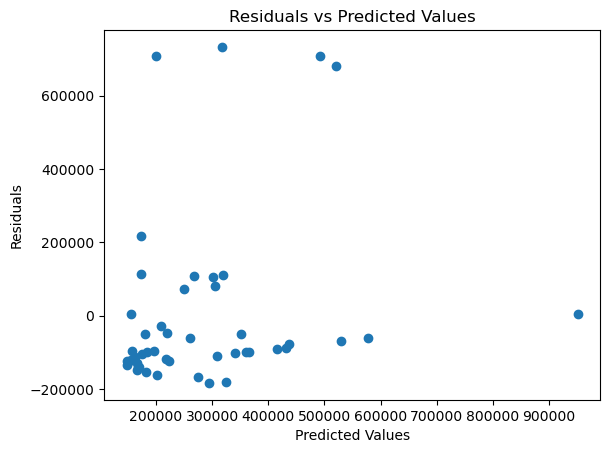

In [675]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()